# Enhanced ESG Theme Classification Heatmap

This notebook demonstrates how to classify ESG (Environmental, Social, Governance) themes in text and visualize the results as a heatmap. This enhanced version includes:
1. An "Other" category for low-confidence classifications
2. Section-by-section analysis for structured reports
3. Updated visualization showing results by section

# Required Libraries

This notebook requires the following libraries (install via requirements.txt):
- spacy (with en_core_web_sm)
- transformers
- pandas
- matplotlib
- seaborn

In [ ]:
# Install required dependencies

# Jupyter Notebook interface for interactive computing
%pip install notebook  

# Natural language processing library for sentence segmentation
%pip install spacy  

# Hugging Face library for loading the ESG-BERT model
%pip install transformers  

# Deep learning backend required by transformers
%pip install torch  

# Data manipulation and analysis library
%pip install pandas  

# Core plotting library for creating visualizations
%pip install matplotlib  

# Advanced visualization library for heatmaps
%pip install seaborn  

In [ ]:
# Download the spaCy English language model
# Required for sentence segmentation
!python -m spacy download en_core_web_sm

# Input Document with Section Headings

Paste your CSR (Corporate Social Responsibility) report or similar text document below. 
For section-by-section analysis, ensure that section headings are formatted with a '#' prefix.

In [23]:
input_text = """

# Executive Summary
GreenVista Enterprises, a leading company in renewable energy solutions, is committed to sustainable growth, environmental stewardship, and responsible corporate governance. Over the past year, we made significant progress towards our sustainability targets, reducing greenhouse gas (GHG) emissions by 18%, achieving zero waste-to-landfill at two manufacturing sites, and launching initiatives to enhance workforce diversity and community engagement. Recognizing our stakeholders' expectations, we've enhanced transparency in governance and expanded our sustainability reporting aligned with global standards.

# Environmental Initiatives and Performance
Our primary focus remains the reduction of our environmental impact. In 2024, we achieved an 18% reduction in GHG emissions, surpassing our initial target of 15%, primarily through transitioning our fleet to electric vehicles and upgrading facility energy systems. Renewable energy now accounts for 60% of our total electricity consumption. Water usage in manufacturing processes was reduced by 12%, while waste recycling rates improved, achieving zero waste-to-landfill certification at two major sites. We are actively pursuing ISO 14001 certification across all facilities by 2025.

We have launched a biodiversity protection program around our primary facilities, resulting in the planting of over 15,000 native trees and restoration of 30 hectares of natural habitat. These initiatives are closely monitored and supported through partnerships with local environmental NGOs and governmental agencies, ensuring our compliance and furthering ecological conservation.

# Social Responsibility and Community Engagement
GreenVista's social strategy prioritizes meaningful community engagement and employee well-being. Our employees contributed over 8,000 volunteer hours in local community projects, focusing on education, healthcare access, and environmental conservation. In collaboration with the United Way, we donated $2 million to fund community infrastructure improvements, educational grants, and healthcare initiatives.

Employee wellness remains a cornerstone of our internal policies. In 2024, we expanded mental health services, introduced wellness programs, and improved workplace safety protocols, resulting in a 20% reduction in workplace incidents. Our annual employee satisfaction survey indicated a 92% satisfaction rate, an improvement of 5% from the previous year.

# Diversity, Equity, and Inclusion
GreenVista is committed to creating a diverse, inclusive, and equitable workplace. Our diversity initiatives led to a 30% increase in hiring from underrepresented communities, supported by revised recruitment strategies and comprehensive bias-awareness training. We established a Diversity Council tasked with monitoring diversity metrics and advising on policy improvements.

Gender diversity at the leadership level increased, with women occupying 40% of senior management roles, up from 30% last year. We continue to implement structured mentorship programs aimed at career development for minority groups within the company, ensuring equitable access to advancement opportunities.

# Corporate Governance
Corporate governance remains central to our business ethos, focusing on transparency, accountability, and integrity. Our board composition now includes 70% independent directors, exceeding regulatory requirements, and providing robust oversight. We established a comprehensive anti-corruption compliance framework in line with international best practices and conducted mandatory training for all managerial roles.

In response to stakeholder requests, we strengthened our whistleblower protections, introducing an anonymous reporting hotline and enhanced internal investigation procedures. Regular audits of governance practices are now standard procedure, ensuring ongoing compliance and transparency.

# Supply Chain Management
In 2024, we conducted comprehensive ESG audits on 85% of our supply chain partners, ensuring adherence to our stringent environmental, ethical, and human rights standards. We terminated relationships with suppliers failing to meet our criteria and collaborated closely with remaining partners to facilitate compliance improvements.

Through our Supplier Sustainability Initiative, we provided sustainability training and resources to key suppliers, helping them reduce their carbon footprints by an average of 10%. By 2026, we aim to source 95% of materials from certified sustainable sources, significantly mitigating supply chain-related environmental risks.

# Sustainability Goals and Metrics
Looking forward, GreenVista has set ambitious sustainability goals: reduce total GHG emissions by 40% from 2020 levels by 2030, achieve company-wide zero waste-to-landfill by 2028, and obtain renewable energy certification for 100% of our electricity consumption by 2027.

We have established detailed sustainability metrics and integrated them into executive performance assessments to ensure alignment with our long-term goals. Quarterly progress reports will be made publicly available to maintain transparency and accountability towards our stakeholders.

# Stakeholder Engagement
Effective stakeholder engagement remains a crucial element of our ESG strategy. In 2024, we significantly increased our communication with investors, communities, and non-profit organizations. Regular ESG forums and feedback sessions were conducted, resulting in improved stakeholder relations and valuable insights that shaped our ESG strategies.

We also enhanced digital communication platforms to provide stakeholders with timely access to ESG performance data, corporate news, and updates on strategic initiatives. Engagement surveys indicate an 85% approval rating of our ESG transparency and responsiveness to stakeholder concerns.

# Risk Management
Robust risk management practices have been expanded to include comprehensive ESG-related risk assessments. In 2024, we conducted a detailed climate risk assessment, identifying potential physical and transitional risks. We have integrated these findings into our strategic planning and financial forecasting models, increasing our resilience to climate-related disruptions.

Additionally, we improved our cybersecurity infrastructure to address increasing data privacy and security threats, implementing advanced threat detection systems, employee training, and data governance policies, resulting in zero significant data breaches.

# Future Commitments
Looking ahead, GreenVista pledges to continue prioritizing ESG performance by enhancing our environmental footprint, advancing social responsibility, and reinforcing governance standards. New initiatives, such as expanding renewable energy infrastructure, scaling biodiversity conservation projects, and increasing community investment, are set to launch over the next three years.

We will remain actively involved with global sustainability coalitions and adhere to evolving ESG reporting standards, including alignment with the Task Force on Climate-Related Financial Disclosures (TCFD) by 2026. Our commitment to sustainable growth and transparent governance remains unwavering, as we strive to deliver long-term value for all our stakeholders.


"""

# Section Parsing and Sentence Splitting with spaCy

In [11]:
# Import the spaCy library and other necessary libraries
import spacy
import re
import pandas as pd

# Load the English language model (small version)
nlp = spacy.load("en_core_web_sm")

# Define a function to parse the document into sections
def parse_sections(text):
    """
    Parse the input document into sections based on headings.
    
    Args:
        text (str): The input document text with section headings prefixed with '#'
        
    Returns:
        dict: A dictionary where keys are section headings and values are section texts
    """
    # Split the text by lines that start with '#'
    # The regex pattern matches lines that start with '#' followed by any characters
    section_pattern = r'(?:^|\n)#\s*([^\n]+)'
    
    # Find all section headings
    headings = re.findall(section_pattern, text)
    
    # Split the text by section headings
    sections_text = re.split(section_pattern, text)
    
    # Remove the first element (empty string before the first heading)
    if sections_text[0].strip() == '':
        sections_text = sections_text[1:]
    
    # If no sections are found, treat the entire text as one section
    if not headings:
        return {"Document": text}
    
    # Create a dictionary of section headings and their content
    sections = {}
    for i, heading in enumerate(headings):
        if i < len(sections_text):
            sections[heading.strip()] = sections_text[i].strip()
    
    return sections

# Process the input text to extract sections
sections = parse_sections(input_text)

# Print the sections for verification
print(f"Found {len(sections)} sections:")
for heading, content in sections.items():
    print(f"\n--- {heading} ---")
    print(content[:100] + "..." if len(content) > 100 else content)

Found 6 sections:

--- Executive Summary ---
Executive Summary

--- Diversity and Inclusion ---
At GreenTech Solutions, we are committed to reducing our carbon emissions by 40% by 2030. As part of...

--- Community Engagement ---
Diversity and Inclusion

--- Corporate Governance ---
We believe in creating an inclusive and equitable workplace. Our diversity and inclusion committee h...

--- Supply Chain Management ---
Community Engagement

--- Sustainability Goals ---
To support local communities, we donated over $1 million to education and housing initiatives in 202...


# ESG Classification with Transformers and "Other" Category

In [12]:
# Import necessary modules from transformers and torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

# Load the pretrained ESG-BERT model and tokenizer from Hugging Face
# This model is specifically trained to classify text into ESG categories
model_name = "nbroad/ESG-BERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define a confidence threshold for the "Other" category
# If the highest class probability is below this threshold, the sentence will be classified as "Other"
CONFIDENCE_THRESHOLD = 0.60  # 60% confidence threshold

# Define a function to classify sentences into detailed ESG categories with "Other" category
def classify_sentence(sentence):
    """
    Classify a sentence into one of the 26 detailed ESG categories and map it to its main ESG pillar,
    or classify it as "Other" if confidence is below the threshold.
    
    Args:
        sentence (str): The input sentence to classify
        
    Returns:
        tuple: (detailed_category_name, main_esg_pillar, confidence_score) where:
               - detailed_category_name is the specific ESG category (e.g., "GHG_Emissions") or "Other"
               - main_esg_pillar is the high-level ESG category ("Environmental", "Social", "Governance", or "Other")
               - confidence_score is the model's confidence in the prediction
    """
    # Step 1: Tokenize the input sentence
    # Convert the text into tokens that the model can understand
    # return_tensors="pt" returns PyTorch tensors
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
    
    # Step 2: Feed the tokenized sentence into the model to obtain raw logits
    # Set model to evaluation mode and disable gradient calculation for inference
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    
    # Step 3: Apply softmax function to convert logits into probability distribution
    # Softmax normalizes the logits so they sum to 1, representing probabilities
    probabilities = F.softmax(logits, dim=1)
    
    # Get the predicted class (highest probability)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    probability_value = probabilities[0][predicted_class].item()
    
    # Step 4: Check if the confidence is below the threshold
    # If so, classify as "Other"
    if probability_value < CONFIDENCE_THRESHOLD:
        return "Other", "Other", probability_value
    
    # Step 5: Map the predicted numerical label to detailed ESG categories
    # This mapping is based on the SASB framework as specified in the task
    detailed_categories = {
        # Environmental Categories
        13: "Physical_Impacts_Of_Climate_Change",
        19: "Waste_And_Hazardous_Materials_Management",
        20: "Water_And_Wastewater_Management",
        21: "Air_Quality",
        23: "Ecological_Impacts",
        24: "Energy_Management",
        25: "GHG_Emissions",
        # Social Categories
        1: "Data_Security",
        2: "Access_And_Affordability",
        6: "Customer_Welfare",
        8: "Employee_Engagement_Inclusion_And_Diversity",
        9: "Employee_Health_And_Safety",
        10: "Human_Rights_And_Community_Relations",
        11: "Labor_Practices",
        14: "Product_Quality_And_Safety",
        16: "Selling_Practices_And_Product_Labeling",
        22: "Customer_Privacy",
        # Governance Categories
        0: "Business_Ethics",
        3: "Business_Model_Resilience",
        4: "Competitive_Behavior",
        5: "Critical_Incident_Risk_Management",
        7: "Director_Removal",
        12: "Management_Of_Legal_And_Regulatory_Framework",
        15: "Product_Design_And_Lifecycle_Management",
        17: "Supply_Chain_Management",
        18: "Systemic_Risk_Management"
    }
    
    # Step 6: Map each detailed category to its main ESG pillar
    # This grouping is based on the SASB framework as specified in the task
    esg_pillars = {
        # Environmental Categories
        "Physical_Impacts_Of_Climate_Change": "Environmental",
        "Waste_And_Hazardous_Materials_Management": "Environmental",
        "Water_And_Wastewater_Management": "Environmental",
        "Air_Quality": "Environmental",
        "Ecological_Impacts": "Environmental",
        "Energy_Management": "Environmental",
        "GHG_Emissions": "Environmental",
        # Social Categories
        "Data_Security": "Social",
        "Access_And_Affordability": "Social",
        "Customer_Welfare": "Social",
        "Employee_Engagement_Inclusion_And_Diversity": "Social",
        "Employee_Health_And_Safety": "Social",
        "Human_Rights_And_Community_Relations": "Social",
        "Labor_Practices": "Social",
        "Product_Quality_And_Safety": "Social",
        "Selling_Practices_And_Product_Labeling": "Social",
        "Customer_Privacy": "Social",
        # Governance Categories
        "Business_Ethics": "Governance",
        "Business_Model_Resilience": "Governance",
        "Competitive_Behavior": "Governance",
        "Critical_Incident_Risk_Management": "Governance",
        "Director_Removal": "Governance",
        "Management_Of_Legal_And_Regulatory_Framework": "Governance",
        "Product_Design_And_Lifecycle_Management": "Governance",
        "Supply_Chain_Management": "Governance",
        "Systemic_Risk_Management": "Governance"
    }
    
    # Get the detailed category name
    detailed_category = detailed_categories.get(predicted_class, f"Unknown_Category_{predicted_class}")
    
    # Get the main ESG pillar for this detailed category
    main_pillar = esg_pillars.get(detailed_category, "Unknown")
    
    # Return the tuple with detailed category, main pillar, and confidence score
    return detailed_category, main_pillar, probability_value

# Test the function on a sample sentence
sample_sentence = "The company reduced carbon emissions by 15% this year."
detailed_category, main_pillar, confidence = classify_sentence(sample_sentence)
print(f"Sample: '{sample_sentence}'")
print(f"Detailed ESG Category: {detailed_category}")
print(f"Main ESG Pillar: {main_pillar}")
print(f"Confidence: {confidence:.4f} ({confidence*100:.2f}%)")

# Test with a low confidence example
low_confidence_sample = "The meeting was scheduled for next Tuesday at 3 PM."
detailed_category, main_pillar, confidence = classify_sentence(low_confidence_sample)
print(f"\nLow confidence sample: '{low_confidence_sample}'")
print(f"Detailed ESG Category: {detailed_category}")
print(f"Main ESG Pillar: {main_pillar}")
print(f"Confidence: {confidence:.4f} ({confidence*100:.2f}%)")

Sample: 'The company reduced carbon emissions by 15% this year.'
Detailed ESG Category: GHG_Emissions
Main ESG Pillar: Environmental
Confidence: 0.8406 (84.06%)

Low confidence sample: 'The meeting was scheduled for next Tuesday at 3 PM.'
Detailed ESG Category: Other
Main ESG Pillar: Other
Confidence: 0.2114 (21.14%)


# Section-by-Section Analysis

In [13]:
# Function to process a section and classify its sentences
def analyze_section(section_text):
    """
    Process a section of text, split it into sentences, and classify each sentence.
    
    Args:
        section_text (str): The text content of a section
        
    Returns:
        dict: A dictionary with counts for each ESG category and detailed results
    """
    # Process the section text with spaCy to extract sentences
    doc = nlp(section_text)
    sentences = [sent.text.strip() for sent in doc.sents]
    
    # Initialize counters for each ESG category including "Other"
    category_counts = {
        "Environmental": 0,
        "Social": 0,
        "Governance": 0,
        "Other": 0
    }
    
    # Initialize a list to store detailed classification results
    detailed_results = []
    
    # Process each sentence in the section
    for sentence in sentences:
        # Skip empty sentences
        if not sentence.strip():
            continue
            
        # Classify the sentence
        detailed_category, main_pillar, confidence = classify_sentence(sentence)
        
        # Increment the appropriate counter
        category_counts[main_pillar] += 1
        
        # Add the detailed result to the list
        detailed_results.append({
            'sentence': sentence,
            'detailed_category': detailed_category,
            'main_pillar': main_pillar,
            'confidence': confidence
        })
    
    # Return the results
    return {
        'counts': category_counts,
        'detailed_results': detailed_results,
        'total_sentences': len(sentences)
    }

# Process each section in the document
section_analysis = {}
for heading, content in sections.items():
    print(f"Analyzing section: {heading}...")
    section_analysis[heading] = analyze_section(content)

# Create a DataFrame for the section-by-section analysis
section_df = pd.DataFrame([
    section_analysis[heading]['counts'] for heading in sections.keys()
], index=sections.keys())

# Display the section-by-section analysis
print("\nSection-by-Section ESG Category Distribution:")
print(section_df)

# Calculate totals for each category
totals = section_df.sum()
section_df.loc['Total'] = totals
print("\nTotal ESG Category Distribution:")
print(section_df.loc['Total'])

Analyzing section: Executive Summary...
Analyzing section: Diversity and Inclusion...
Analyzing section: Community Engagement...
Analyzing section: Corporate Governance...
Analyzing section: Supply Chain Management...
Analyzing section: Sustainability Goals...

Section-by-Section ESG Category Distribution:
                         Environmental  Social  Governance  Other
Executive Summary                    0       0           0      1
Diversity and Inclusion              2       0           0      0
Community Engagement                 0       1           0      0
Corporate Governance                 0       2           0      0
Supply Chain Management              0       1           0      0
Sustainability Goals                 0       1           0      1

Total ESG Category Distribution:
Environmental    2
Social           5
Governance       0
Other            2
Name: Total, dtype: int64


# Updated Heatmap Visualization with "Other" Category

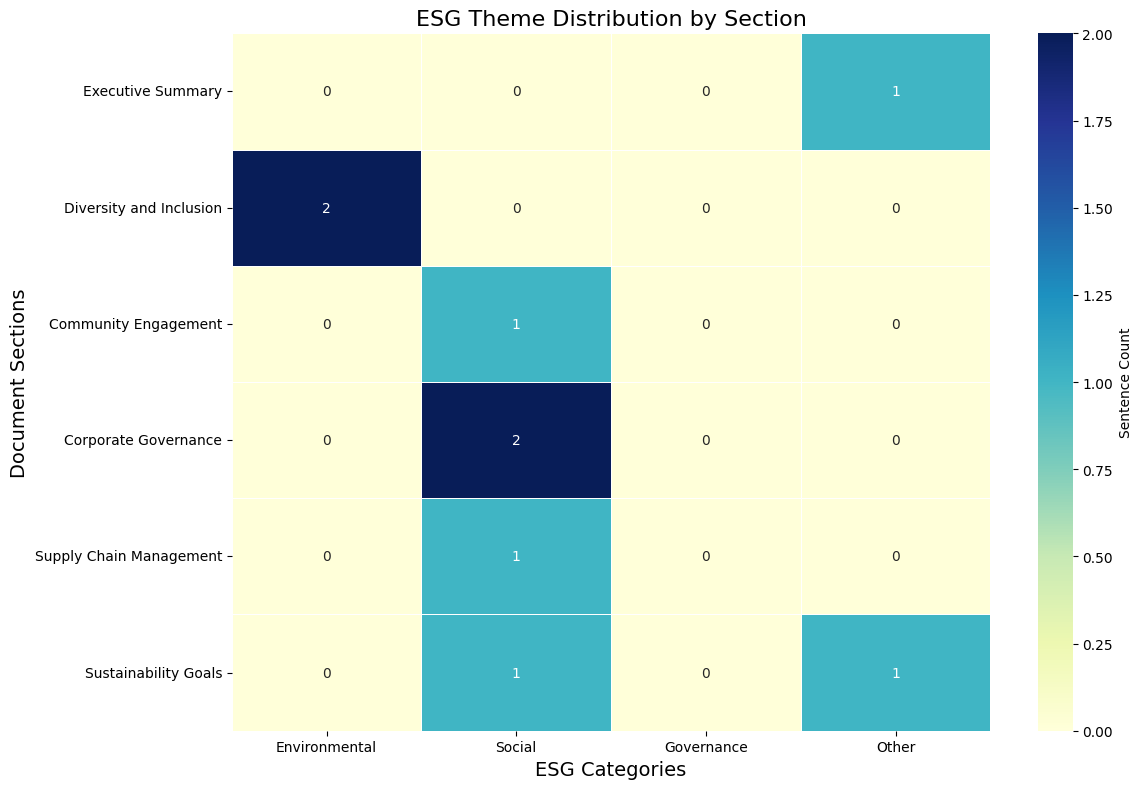

In [15]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better visualization
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
# - data: The DataFrame containing our section-by-section ESG category counts
# - annot=True: Display the numerical values in each cell
# - cmap="YlGnBu": Use the Yellow-Green-Blue color palette
# - fmt="d": Format annotations as integers (d = decimal integer)
# - linewidths=.5: Add thin lines between cells for better separation
# - cbar=True: Include a color bar legend
ax = sns.heatmap(section_df.iloc[:-1], # Exclude the 'Total' row for the heatmap
                annot=True,        # Show the count values in each cell
                cmap="YlGnBu",     # Use the Yellow-Green-Blue color palette
                fmt="d",           # Format annotations as integers
                linewidths=.5,     # Add thin lines between cells
                cbar_kws={'label': 'Sentence Count'})  # Label the color bar

# Set the title for the heatmap
plt.title("ESG Theme Distribution by Section", fontsize=16)

# Customize the axis labels
plt.xlabel("ESG Categories", fontsize=14)
plt.ylabel("Document Sections", fontsize=14)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the heatmap
plt.show()

# Detailed Analysis of Classification Results

In [16]:
# Create a DataFrame with all detailed classification results
all_results = []
for section, analysis in section_analysis.items():
    for result in analysis['detailed_results']:
        result['section'] = section
        all_results.append(result)

detailed_df = pd.DataFrame(all_results)

# Display the distribution of detailed ESG categories
print("Detailed ESG Category Distribution:")
detailed_counts = detailed_df['detailed_category'].value_counts()
print(detailed_counts)

# Display the distribution of main ESG pillars
print("\nMain ESG Pillar Distribution:")
pillar_counts = detailed_df['main_pillar'].value_counts()
print(pillar_counts)

# Calculate the percentage of sentences classified as "Other"
other_count = pillar_counts.get("Other", 0)
total_count = len(detailed_df)
other_percentage = (other_count / total_count * 100) if total_count > 0 else 0
print(f"\nPercentage of sentences classified as 'Other': {other_percentage:.2f}%")

# Display the average confidence score
avg_confidence = detailed_df['confidence'].mean()
print(f"Average confidence score: {avg_confidence:.4f} ({avg_confidence*100:.2f}%)")

Detailed ESG Category Distribution:
detailed_category
Employee_Engagement_Inclusion_And_Diversity    3
Other                                          2
Human_Rights_And_Community_Relations           2
Energy_Management                              1
GHG_Emissions                                  1
Name: count, dtype: int64

Main ESG Pillar Distribution:
main_pillar
Social           5
Other            2
Environmental    2
Name: count, dtype: int64

Percentage of sentences classified as 'Other': 22.22%
Average confidence score: 0.8032 (80.32%)


# Complete Workflow: End-to-End Enhanced ESG Classification and Visualization

This notebook demonstrates an enhanced ESG classification workflow that includes:

1. **Section-by-Section Analysis**: Parses structured documents with section headings to provide more granular insights.
2. **"Other" Category**: Adds an "Other" category for sentences with low classification confidence (below 60%).
3. **Enhanced Visualization**: Creates a heatmap showing ESG theme distribution across document sections.

This enhanced workflow provides more nuanced insights into ESG themes in corporate reports or other text documents, helping to identify which sections focus on which sustainability aspects and avoiding forced classifications for ambiguous content.

In [17]:
# Function to run the complete enhanced ESG classification workflow
def analyze_esg_document(document_text, confidence_threshold=0.60):
    """
    Run the complete enhanced ESG classification workflow on a document.
    
    Args:
        document_text (str): The input document text
        confidence_threshold (float): The confidence threshold for the "Other" category
        
    Returns:
        dict: A dictionary containing the analysis results
    """
    global CONFIDENCE_THRESHOLD
    CONFIDENCE_THRESHOLD = confidence_threshold
    
    # Step 1: Parse the document into sections
    sections = parse_sections(document_text)
    print(f"Found {len(sections)} sections in the document.")
    
    # Step 2: Analyze each section
    section_analysis = {}
    for heading, content in sections.items():
        print(f"Analyzing section: {heading}...")
        section_analysis[heading] = analyze_section(content)
    
    # Step 3: Create a DataFrame for the section-by-section analysis
    section_df = pd.DataFrame([
        section_analysis[heading]['counts'] for heading in sections.keys()
    ], index=sections.keys())
    
    # Calculate totals for each category
    totals = section_df.sum()
    section_df.loc['Total'] = totals
    
    # Step 4: Create a heatmap visualization
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(section_df.iloc[:-1],
                    annot=True,
                    cmap="YlGnBu",
                    fmt="d",
                    linewidths=.5,
                    cbar_kws={'label': 'Sentence Count'})
    
    plt.title("ESG Theme Distribution by Section", fontsize=16)
    plt.xlabel("ESG Categories", fontsize=14)
    plt.ylabel("Document Sections", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Return the analysis results
    return {
        'sections': sections,
        'section_analysis': section_analysis,
        'section_df': section_df,
        'detailed_df': detailed_df,
        'confidence_threshold': confidence_threshold,
        'figure': plt.gcf()  # Get current figure
    }
